# Convolutional Networks

Convolutional networks(LeCun, 1989), also known as convolutional neural networks, or CNNs, are a specialized kind of neural network for processing datathat has a known grid-like topology. Examples include time-series data, which canbe thought of as a 1-D grid taking samples at regular time intervals, and image data,which can be thought of as a 2-D grid of pixels. Convolutional networks have beentremendously successful in practical applications. The name “convolutional neuralnetwork” indicates that the network employs a mathematical operation calledconvolution. Convolution is a specialized kind of linear operation. Convolutional networks are simply neural networks that use convolution in place of general matrixmultiplication in at least one of their layers.

@source{{\url{http://www.deeplearningbook.org}}}

## Let's check a simple example of how CNNs are effective

Let's fit the MNIST dataset with and without CNNs

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
#import the data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

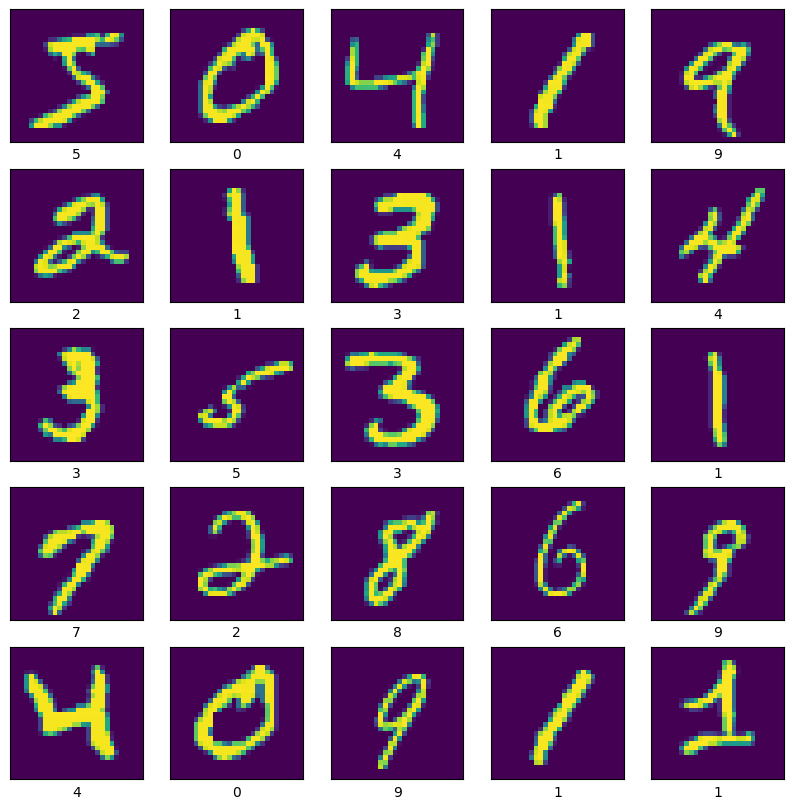

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(str(train_labels[i]))
plt.show()

In [3]:
#Now let's build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10)
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 17170 (67.07 KB)
Trainable params: 17170 (

In [4]:
#Comple the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
#train
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 0.4240 - accuracy: 0.8709
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1992 - accuracy: 0.9408
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1651 - accuracy: 0.9507
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1447 - accuracy: 0.9563
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1319 - accuracy: 0.9589
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1202 - accuracy: 0.9632
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1130 - accuracy: 0.9650
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1068 - accuracy: 0.9674
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1003 - accuracy: 0.9686
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.

In [6]:
#Let's test its accuracy!
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1352 - accuracy: 0.9602 - 756ms/epoch - 2ms/step

Test accuracy: 0.9602000117301941


### Let's now build our first CNN

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

#
train_images= train_images.reshape(-1, 28, 28, 1)

model = model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(10, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)              

In [8]:
#Comple the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 9s 3ms/step - loss: 0.2087 - accuracy: 0.9369
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0743 - accuracy: 0.9781
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0576 - accuracy: 0.9822


In [9]:
#Let's test its accuracy!

test_images= test_images.reshape(-1, 28, 28, 1)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0370 - accuracy: 0.9880 - 808ms/epoch - 3ms/step

Test accuracy: 0.9879999756813049


we have seen how we can boost our perfromance just by changing the type of network to CNN!

### Let's break down what we did !

In [10]:
# What is this?
train_images= train_images.reshape(-1, 28, 28, 1)

In [11]:
import numpy as np
m = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12]])
m.shape

(3, 4)

In [12]:
m.reshape(-1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [13]:
m.reshape(-1, 2)


array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

So this implies that **the row value is inferred from the length of the array and remaining dimensions**

In [14]:
#here we specify the input shape (28 pixels, 28 pixels, 1 channel (black/white (greyscale)))
keras.Input(shape=(28, 28, 1))

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_2')>

In [15]:
# We have 32 kernels (filters) with size 3 pixels by 3 pixles,  relu is applied right after the
layers.Conv2D(32, kernel_size=(3, 3), activation="relu")

![alt text](https://d2l.ai/_images/conv-pad.svg "Title")
source: https://d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html

In [16]:
# Pooling is not a real neural layer. It is an operation layer as show below
# You see that we are choosing a filter size of 2x2 pixels
layers.MaxPooling2D(pool_size=(2, 2))

![alt text](https://d2l.ai/_images/pooling.svg "Title")
source: https://d2l.ai/chapter_convolutional-neural-networks/pooling.html

### Flatten layer
A flatten layer collapses the spatial dimensions of the input into the channel dimension

In [17]:
layers.Flatten()

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)              

In [19]:
5*5*32

800

In [20]:
layers.Dropout(0.2)

![alt text](https://d2l.ai/_images/dropout2.svg "Title")
source: https://d2l.ai/chapter_multilayer-perceptrons/dropout.html

The method is called dropout because we literally drop out some neurons during training.


In [21]:
# Just another dense layer to do the classification!
layers.Dense(10, activation="softmax")

## Let's now train a more complex dataset and apply advanced options!

### Regularization

When addressing with overfitting, regularization is a typical approach.
To decrease the complexities of the trained models, it introduces a penalty function to the  loss function.

class L1: A regularizer that applies a L1 regularization penalty.

class L1L2: A regularizer that applies both L1 and L2 regularization penalties.

class L2: A regularizer that applies a L2 regularization penalty.

class Regularizer: Regularizer base class.

class l1: A regularizer that applies a L1 regularization penalty.

class l2: A regularizer that applies a L2 regularization penalty.

In [22]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

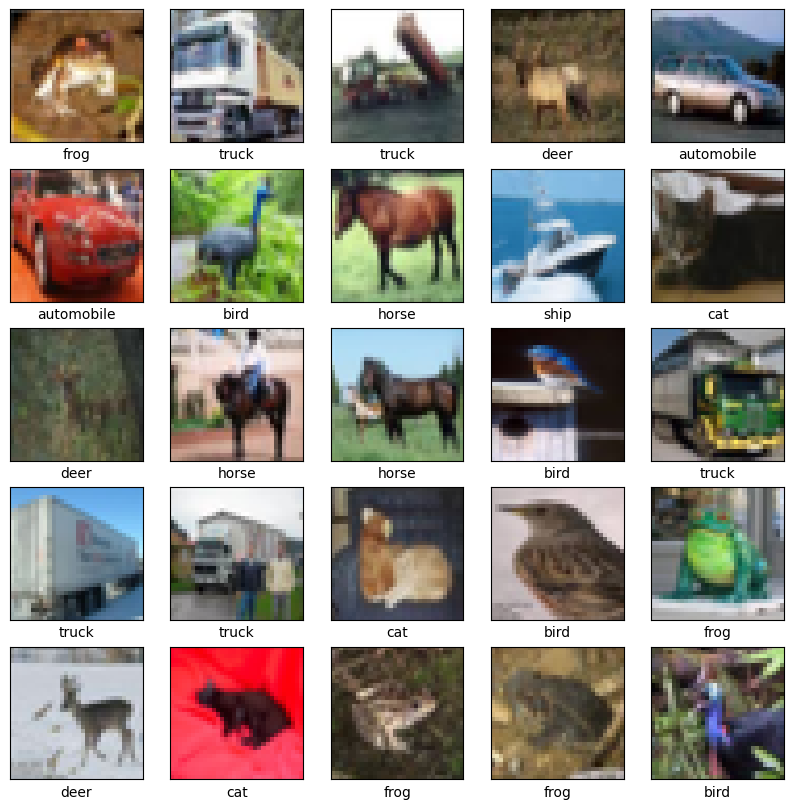

In [23]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [24]:
from tensorflow.keras import models
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [26]:
# Let's add dense layers with regularization!
model.add(layers.Flatten())
model.add(layers.Dense(64, kernel_regularizer='l2', activation='relu'))
model.add(layers.Dense(10))

In [27]:
# Compile and train
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 11s 6ms/step - loss: 1.7648 - accuracy: 0.3845 - val_loss: 1.4949 - val_accuracy: 0.4809
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4075 - accuracy: 0.5185 - val_loss: 1.4832 - val_accuracy: 0.5090
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2892 - accuracy: 0.5663 - val_loss: 1.2333 - val_accuracy: 0.5833
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2208 - accuracy: 0.5910 - val_loss: 1.2225 - val_accuracy: 0.5907
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1694 - accuracy: 0.6101 - val_loss: 1.1610 - val_accuracy: 0.6185
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1203 - accuracy: 0.6269 - val_loss: 1.1419 - val_accuracy: 0.6199
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0842 - accuracy: 0.6401 - val_loss: 1.1363 - val_accuracy

313/313 - 1s - loss: 1.0262 - accuracy: 0.6741 - 682ms/epoch - 2ms/step


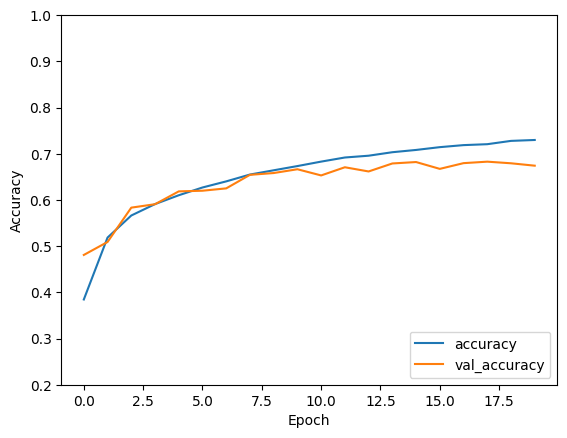

In [28]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Let's do it without regularization

In [29]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Let's add dense layers with regularization!
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile and train
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 10s 5ms/step - loss: 1.5427 - accuracy: 0.4380 - val_loss: 1.2878 - val_accuracy: 0.5382
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2067 - accuracy: 0.5720 - val_loss: 1.1370 - val_accuracy: 0.6008
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0771 - accuracy: 0.6200 - val_loss: 1.1151 - val_accuracy: 0.6136
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9908 - accuracy: 0.6525 - val_loss: 1.0210 - val_accuracy: 0.6479
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9226 - accuracy: 0.6782 - val_loss: 0.9728 - val_accuracy: 0.6572
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8638 - accuracy: 0.6954 - val_loss: 0.9678 - val_accuracy: 0.6695
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8193 - accuracy: 0.7128 - val_loss: 1.0137 - val_accuracy

313/313 - 1s - loss: 1.0872 - accuracy: 0.6852 - 722ms/epoch - 2ms/step


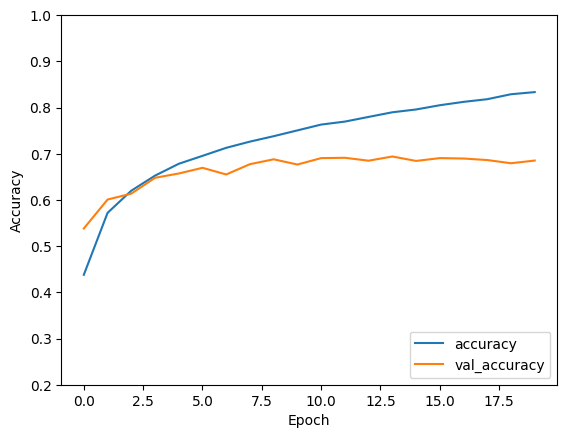

In [30]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Data Augmentation

A technique to increase the diversity of your training set by applying random (but realistic) transformations such as image rotation. You will learn how to apply data augmentation in two ways. First, you will use Keras Preprocessing Layers. Next, you will use tf.image.

A Google colab version can be found here:https://www.tensorflow.org/tutorials/images/data_augmentation

In [31]:
#!pip install --upgrade protobuf

In [32]:
import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

In [33]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [34]:
#There are five different kinds of flowers here
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


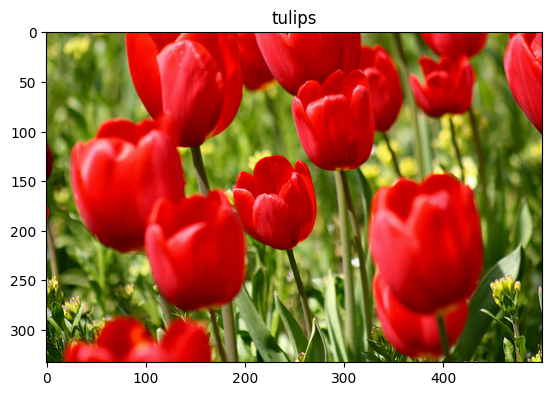

In [35]:
#Let's augment an image
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [36]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

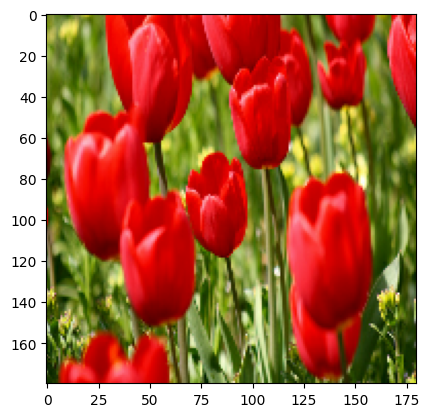

In [37]:
#resizing and scaling
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [38]:
#Let's do some flips!
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [39]:
# Add the image to a batch
image = tf.expand_dims(image, 0)

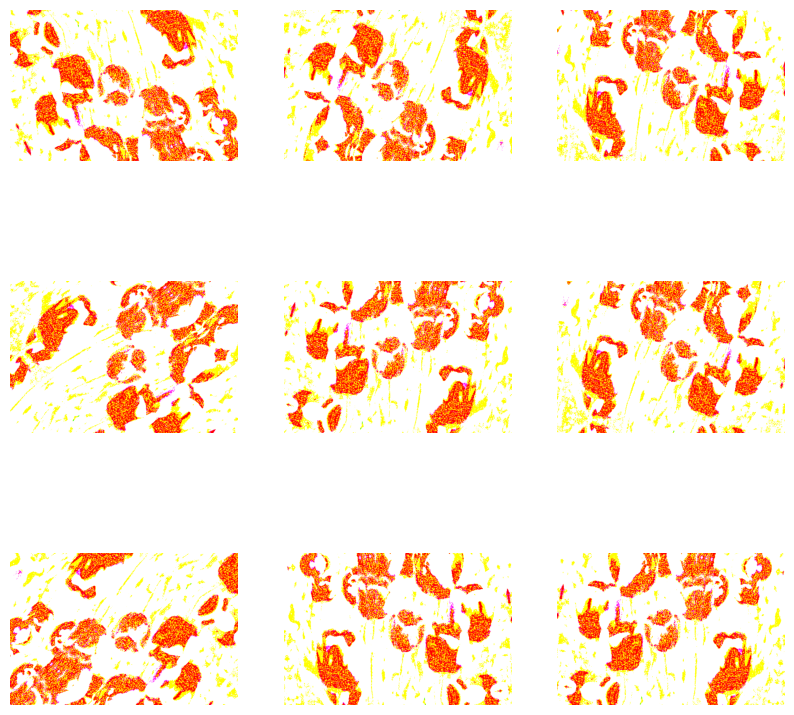

In [40]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

### You have two options with data augmentation

Option 1: Make the preprocessing layers part of your model:

In [41]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model
])

Option 2: Apply the preprocessing layers to your dataset

In [42]:
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

In [43]:
# Let's do the second option!
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefecting on all datasets
  return ds.prefetch(buffer_size=AUTOTUNE)

In [44]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [45]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 18s 153ms/step - loss: 1.3837 - accuracy: 0.3988 - val_loss: 1.1541 - val_accuracy: 0.5831
Epoch 2/5
92/92 [==============================] - 11s 108ms/step - loss: 1.0681 - accuracy: 0.5698 - val_loss: 1.0297 - val_accuracy: 0.6158
Epoch 3/5
92/92 [==============================] - 11s 118ms/step - loss: 0.9600 - accuracy: 0.6141 - val_loss: 0.9140 - val_accuracy: 0.6812
Epoch 4/5
92/92 [==============================] - 11s 116ms/step - loss: 0.9097 - accuracy: 0.6451 - val_loss: 0.9388 - val_accuracy: 0.6322
Epoch 5/5
92/92 [==============================] - 11s 119ms/step - loss: 0.8655 - accuracy: 0.6577 - val_loss: 0.8554 - val_accuracy: 0.6730


In [48]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 1s 79ms/step - loss: 0.7843 - accuracy: 0.6540
Accuracy 0.6539509296417236


### You can also customize augmentation!
You can also create custom data augmenation layers. This tutorial shows two ways of doing so. First, you will create a layers.Lambda layer. This is a good way to write concise code. Next, you will write a new layer via subclassing, which gives you more control. Both layers will randomly invert the colors in an image, according to some probability.

In [49]:
def random_invert_img(x, p=0.5):
    if  tf.random.uniform([]) < p:
        x = (255-x)
    else:
        x
    return x

In [50]:
def random_invert(factor=0.5):
    return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

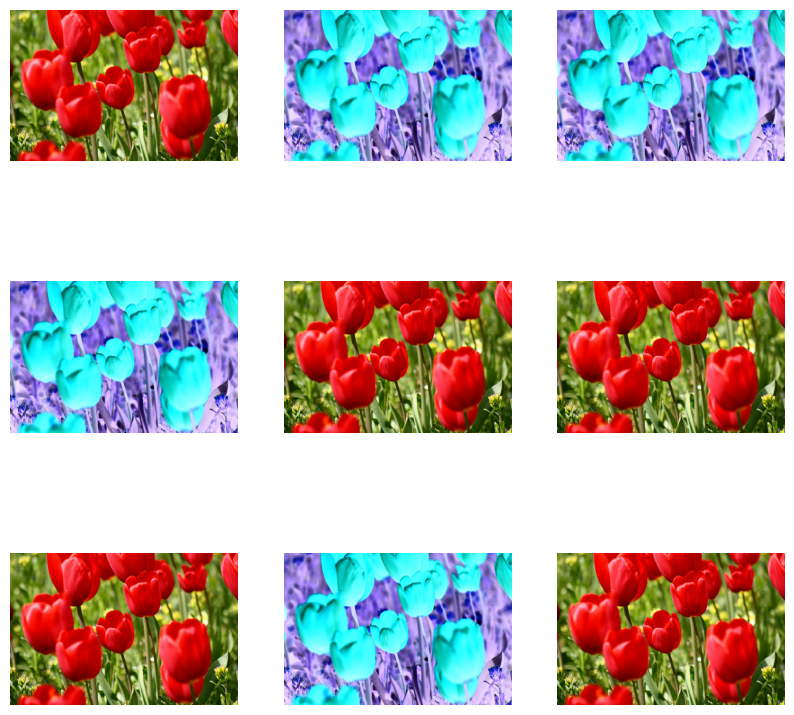

In [51]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = random_invert(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy().astype("uint8"))
    plt.axis("off")

In [52]:
#Next, implement a custom layer by subclassing
class RandomInvert(layers.Layer):
    def __init__(self, factor=0.5, **kwargs):
        super().__init__(**kwargs)
        self.factor = factor

    def call(self, x):
        return random_invert_img(x)

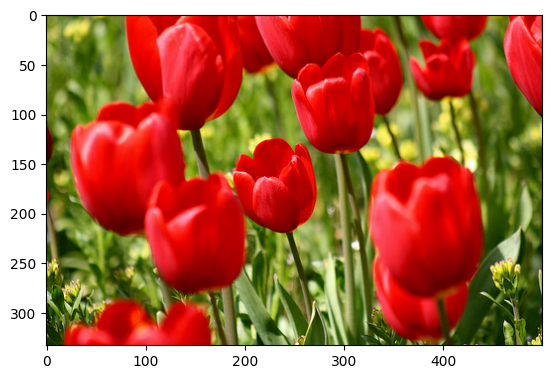

In [53]:
plt.imshow(RandomInvert()(image)[0])

#### Applying data augmentation to a dataset

From the second option, you also have two options:
- Option 1: Using tf.data.experimental.Counter()
- Option 2: Using tf.random.Generator

In [54]:
#Let's first redownload the dataset
(train_datasets, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# Let's define a utility function for resizing and rescaling the images

def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label

#Let's also define augment function that can apply the random transformations to the images
def augment(image_label, seed):
    image, label = image_label
    image, label = resize_and_rescale(image, label)
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
    # Make a new seed
    new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
    # Random crop back to the original size
    image = tf.image.stateless_random_crop(
        image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)
    # Random brightness
    image = tf.image.stateless_random_brightness(
        image, max_delta=0.5, seed=new_seed)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

- Option 1: Using tf.data.experimental.Counter()

In [55]:
# Create counter and zip together with train dataset
counter = tf.data.experimental.Counter()

train_ds = tf.data.Dataset.zip((train_datasets, (counter, counter)))

# Map the augment function to the training dataset
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)


val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)


test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.


- Option 2:  Using tf.random.Generator

In [56]:
# Create a generator
rng = tf.random.Generator.from_seed(123, alg='philox')

# A wrapper function for updating seeds
def f(x, y):
    seed = rng.make_seeds(2)[0]
    image, label = augment((x, y), seed)
    return image, label

#Map the wrapper function f to the training dataset.

train_ds = (
    train_datasets
    .shuffle(1000)
    .map(f, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)


val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

References:
https://www.tensorflow.org/tutorials